# Analytical Exploration of Boston Crime Statistics

## Content 

    1. Introduction
    2. Import
    3. Read Data
    4. Clean Data and Combine
    5. Motivation
    6. Exploration and Visualization

# 1. Introduction

This is an updated version of  an EDA I previously did last year (2017) using the same data set. This EDA examines the crime statistic from 2012 to 2015 using data provided by data.boston.gov. 

I was a victim in an incident, and exactly one year later while at my Functional Programming class I was curious if there was a dataset on Boston crimes, and if I could find myself in it! Read more under Motivation.

# 2. Import

In [1]:
# To explicitly display dataframe 
from IPython.display import display

# numpy for math and pandas for data processing
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For map
import geopandas as gpd

# plt.style.use("seaborn")
sns.set_theme(context="notebook", style="darkgrid", palette="deep", font="sans-serif", font_scale=1, color_codes=True, rc=None)

# 3. Read Data
    a. Crime
    b. Weather
    c. Map

In [2]:
# a. Crime
# Stores the crime data in a variable called data
# dtype={"SHIFT": "string"} to avoid DtypeWarning
# parse_date to note have to convert later
# on_bad_lines="skip" instead of error_bad_lines = False, change as error_bad_lines is deprecated
crime_part1 = pd.read_csv("./data/crime/crime-incident-reports-2012-2015.csv", dtype={"SHIFT": "string"}, parse_dates=["FROMDATE"], on_bad_lines="skip")
crime_part2 = pd.read_csv("./data/crime/crime-incident-reports-2015.csv", dtype={"SHIFT": "string"}, parse_dates=["OCCURRED_ON_DATE"], on_bad_lines="skip")

# Show top 5 rows
display(crime_part1.head())
display(crime_part2.head())

# Show columns
# Note the differences (X and Y vs LAT and LONG, REPTDISTRICT vs DISTRICT, and minor changes like REPORTINGAREA and REPORTING_AREA)
display(crime_part1.columns.tolist())
display(crime_part2.columns.tolist())

print ("Crime dataset ready..")

,COMPNOS,NatureCode,INCIDENT_TYPE_DESCRIPTION,MAIN_CRIMECODE,REPTDISTRICT,REPORTINGAREA,FROMDATE,WEAPONTYPE,Shooting,DOMESTIC,SHIFT,Year,Month,DAY_WEEK,UCRPART,X,Y,STREETNAME,XSTREETNAME,Location
0,120420285.0,BERPTA,RESIDENTIAL BURGLARY,05RB,D4,629,2012-07-08 06:00:00,Other,No,No,Last,2012,7,Sunday,Part One,763273.1791,2951498.962,ABERDEEN ST,NaN,"(42.34638135, -71.10379454)"
1,120419202.0,PSHOT,AGGRAVATED ASSAULT,04xx,B2,327,2012-07-08 06:03:00,Firearm,Yes,No,Last,2012,7,Sunday,Part One,771223.1638,2940772.099,HOWARD AV,NaN,"(42.31684135, -71.07458456)"
2,120419213.0,ARMROB,ROBBERY,03xx,D4,625,2012-07-08 06:26:00,Firearm,No,No,Last,2012,7,Sunday,Part One,765118.8605,2950217.536,JERSEY ST,QUEENSBERRY ST,"(42.34284135, -71.09698955)"
3,120419223.0,ALARMC,COMMERCIAL BURGLARY,05CB,B2,258,2012-07-08 06:56:00,Other,No,No,Last,2012,7,Sunday,Part One,773591.8648,2940638.174,COLUMBIA RD,NaN,"(42.3164411, -71.06582908)"
4,120419236.0,ARMROB,ROBBERY,03xx,E18,496,2012-07-08 07:15:00,Firearm,No,No,Last,2012,7,Sunday,Part One,759042.7315,2923832.681,COLLINS ST,NaN,"(42.27051636, -71.11989955)"


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192068249,2647,Other,THREATS TO DO BODILY HARM,B2,280,NaN,2015-08-28 10:20:00,2015,8,Friday,10,Part Two,WASHINGTON ST,42.330119,-71.084251,"(42.33011862, -71.08425106)"
1,I192061894,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,C11,356,NaN,2015-08-20 00:00:00,2015,8,Thursday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)"
2,I192038828,1107,Fraud,FRAUD - IMPERSONATION,A1,172,NaN,2015-11-02 12:24:00,2015,11,Monday,12,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)"
3,I192008877,1107,Fraud,FRAUD - IMPERSONATION,E18,525,NaN,2015-07-31 10:00:00,2015,7,Friday,10,Part Two,WINGATE RD,42.237009,-71.129566,"(42.23700950, -71.12956606)"
4,I182090828,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D4,159,NaN,2015-12-01 12:00:00,2015,12,Tuesday,12,Part Two,UPTON ST,42.342432,-71.072258,"(42.34243222, -71.07225766)"


['COMPNOS',
 'NatureCode',
 'INCIDENT_TYPE_DESCRIPTION',
 'MAIN_CRIMECODE',
 'REPTDISTRICT',
 'REPORTINGAREA',
 'FROMDATE',
 'WEAPONTYPE',
 'Shooting',
 'DOMESTIC',
 'SHIFT',
 'Year',
 'Month',
 'DAY_WEEK',
 'UCRPART',
 'X',
 'Y',
 'STREETNAME',
 'XSTREETNAME',
 'Location']

['INCIDENT_NUMBER',
 'OFFENSE_CODE',
 'OFFENSE_CODE_GROUP',
 'OFFENSE_DESCRIPTION',
 'DISTRICT',
 'REPORTING_AREA',
 'SHOOTING',
 'OCCURRED_ON_DATE',
 'YEAR',
 'MONTH',
 'DAY_OF_WEEK',
 'HOUR',
 'UCR_PART',
 'STREET',
 'Lat',
 'Long',
 'Location']

Crime dataset ready..


In [3]:
# b. Weather
# Stores the weather data in a variable called weather
weather_data = pd.read_csv("./data/boston_weather_data.csv", dtype={"SHIFT": "string"}, on_bad_lines="skip")

# Show top 5 rows
display(weather_data.head())

# Show columns
# Note the differences (X and Y vs LAT and LONG, REPTDISTRICT vs DISTRICT, and minor changes like REPORTINGAREA and REPORTING_AREA)
display(weather_data.columns.tolist())

print ("Weather dataset ready..")

,time,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,2013-03-01,3.2,1.1,5.0,0.0,342.0,15.1,1002.7
1,2013-03-02,3.1,1.1,5.6,0.0,307.0,14.4,1004.2
2,2013-03-03,2.6,0.6,6.1,0.0,NaN,14.4,1002.6
3,2013-03-04,1.8,-0.6,5.0,0.0,303.0,28.1,1003.0
4,2013-03-05,2.9,0.0,6.1,0.0,NaN,16.6,1013.5


['time', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']

Weather dataset ready..


In [4]:
# c. Map
# TODO: import once/if dataset recieved

# 4. Clean Data and Combine
    a. Clean and combine 2012-2015 and 2015
    b. Clean weather_data
    c. Combine weather_data and crime_data
    d. Map (TODO)

In [5]:
# a. Clean and combine 2012-2015 and 2015
# Remove columns that we most likely won't use for this EDA
# I wanted to use X and Y instead of location but the numbers weren't formatted correctly
# Instead I will use the Location column to create LAT and LONG to match
crime_part1_columns_to_drop = [
    "COMPNOS",
    "NatureCode",
    "MAIN_CRIMECODE",
    "REPORTINGAREA",
    "WEAPONTYPE",
    "DOMESTIC",
    "SHIFT",
    "UCRPART",
    "XSTREETNAME",
    "X",
    "Y",
    ]
crime_part1 = crime_part1.drop(columns=crime_part1_columns_to_drop)

# Legacy system did not have column for Hour so we will extract it from FROMDATE column
crime_part1.insert(loc = 7, column = "Hour", value = crime_part1["FROMDATE"].dt.hour)

# Since 2012 doesn't start until July, we will drop it, probably should've changed the name of this EDA...
crime_part1 = crime_part1.loc[ crime_part1["FROMDATE"].dt.year > 2012 ]

crime_part1["Location"] = crime_part1.Location.str.replace("(", "").str.replace(")", "")
crime_part1[["Lat","Long"]] = crime_part1.Location.str.split(", ", expand=True) 

crime_part2_columns_to_drop = [
    "INCIDENT_NUMBER",
    "OFFENSE_CODE",
    "OFFENSE_CODE_GROUP",
    "REPORTING_AREA",
    "UCR_PART"
    ]
crime_part2 = crime_part2.drop(columns=crime_part2_columns_to_drop)

crime_rename_column1 = {
    "INCIDENT_TYPE_DESCRIPTION": "Type",
    "REPTDISTRICT": "District",
    "FROMDATE": "Date",
    "SHOOTING": "Shooting",
    "Year": "Year",
    "Month": "Month",
    "DAY_WEEK": "Day",
    "STREETNAME": "Street",
    }
crime_part1.rename(index=str, columns=crime_rename_column1, inplace=True)

crime_rename_column2 = {
    "OFFENSE_DESCRIPTION": "Type",
    "DISTRICT": "District",
    "OCCURRED_ON_DATE": "Date",
    "SHOOTING": "Shooting",
    "YEAR": "Year",
    "MONTH": "Month",
    "DAY_OF_WEEK": "Day",
    "HOUR": "Hour",
    "STREET": "Street",
    }
crime_part2.rename(index=str, columns=crime_rename_column2, inplace=True)

# Combine
crime_data = pd.concat([crime_part1, crime_part2], ignore_index=False, axis=0)

# Preview data after init combination
display(crime_data.head())

,Type,District,Date,Shooting,Year,Month,Day,Hour,Street,Location,Lat,Long
13441,VAL,A1,2013-02-06 11:01:00,No,2013,2,Wednesday,11,BEACH ST,"42.35138634, -71.06082456",42.35138634,-71.06082456
13498,VAL,C6,2013-02-08 14:15:00,No,2013,2,Friday,14,ALLSTATE RD,"42.32543556, -71.06387302",42.32543556,-71.06387302
13527,VAL,B2,2013-02-09 12:00:00,No,2013,2,Saturday,12,AKRON ST,"42.3257856, -71.08563716",42.3257856,-71.08563716
13904,VAL,A7,2013-02-15 09:00:00,No,2013,2,Friday,9,TRENTON ST,"42.38028634, -71.03270957",42.38028634,-71.03270957
14425,VAL,B3,2013-02-15 09:00:00,No,2013,2,Friday,9,FLOYD ST,"42.28954851, -71.08848526",42.28954851,-71.08848526


In [6]:
print("Dataset shape before any changes: ", crime_data.shape)

crime_data["Shooting"] = crime_data["Shooting"].fillna("No")
crime_data["Shooting"] = crime_data["Shooting"].replace("Y", "Yes")

# Comb through Type and combine to parent type
# I used Chat GPT to generate this mapping
crime_type_mapping = {
    'Theft and Larceny': [
        'LARCENY FROM MOTOR VEHICLE', 
        'LARCENY THEFT FROM BUILDING', 
        'LARCENY THEFT FROM COIN-OP MACHINE', 
        'LARCENY ALL OTHERS', 
        'LARCENY THEFT OF BICYCLE', 
        'LARCENY SHOPLIFTING', 
        'LARCENY THEFT OF MV PARTS & ACCESSORIES', 
        'LARCENY PURSE SNATCH - NO FORCE',
        'LARCENY OTHER $200 & OVER', 
        'LARCENY SHOPLIFTING UNDER $50', 
        'LARCENY NON-ACCESSORY FROM VEH. $50 TO $199',
        'LARCENY THEFT FROM MV - NON-ACCESSORY',
        'LARCENY - THEFT OF PROPERTY',
    ],
    'Burglary': [
        'RESIDENTIAL BURGLARY',
        'COMMERCIAL BURGLARY',
        'BURGLARY - RESIDENTIAL - FORCE',
        'BURGLARY - RESIDENTIAL - NO FORCE',
        'BURGLARY - COMMERICAL - FORCE',
        'BURGLARY - COMMERICAL - NO FORCE',
        'BURGLARY - OTHER - FORCE',
        'BURGLARY - OTHER - NO FORCE',
        'BURGLARY - RESIDENTIAL - ATTEMPT',
        'BURGLARY - COMMERICAL - ATTEMPT',
        'BURGLARY - OTHER - ATTEMPT',
    ],
    'Assault': [
        'SIMPLE ASSAULT', 
        'AGGRAVATED ASSAULT', 
        'ASSAULT SIMPLE - BATTERY', 
        'ASSAULT - SIMPLE', 
        'ASSAULT - AGGRAVATED - BATTERY', 
        'A&B ON POLICE OFFICER', 
        'ASSAULT & BATTERY D/W - OTHER',
        'ASSAULT D/W - OTHER',
    ],
    'Homicide': [
        'HOMICIDE', 
        'MURDER, NON-NEGLIGIENT MANSLAUGHTER',
        'DEATH INVESTIGATION',
        'SUICIDE / SUICIDE ATTEMPT', 
        'PRISONER - SUICIDE / SUICIDE ATTEMPT',
    ],
    'Fraud and Financial Crimes': [
        'FRAUD', 
        'FRAUD - CREDIT CARD / ATM FRAUD',
        'FRAUD - IMPERSONATION', 
        'FRAUD - FALSE PRETENSE / SCHEME',
        'FRAUD - WIRE', 
        'FRAUD - WELFARE', 
        'FORGERY', 
        'COUNTERFEITING', 
        'STOLEN PROPERTY - BUYING / RECEIVING / POSSESSING', 
        'FRAUDS - ALL OTHER', 
        'CONFIDENCE GAMES',
        'POSSESSION OF BURGLARIOUS TOOLS',
        'FORGERY / COUNTERFEITING',
    ],
    'Drug Offenses': [
        'DRUG CHARGES', 
        'DRUGS - SALE / MANUFACTURING', 
        'DRUGS - POSS CLASS D', 
        'DRUGS - POSS CLASS B - COCAINE, ETC.', 
        'DRUGS - POSS CLASS A - HEROIN, ETC.',
        'DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP',
        'DRUGS - POSS CLASS A - INTENT TO MFR DIST DISP',
        'DRUGS - POSS CLASS C', 
        'DRUGS - CLASS B TRAFFICKING OVER 18 GRAMS', 
        'DRUGS - CLASS A TRAFFICKING OVER 18 GRAMS', 
        'DRUGS - SICK ASSIST - HEROIN', 
        'DRUGS - SICK ASSIST - OTHER NARCOTIC', 
        'DRUGS - POSSESSION', 
        'DRUGS - POSS CLASS D - INTENT TO MFR DIST DISP', 
        'DRUGS - SICK ASSIST - OTHER HARMFUL DRUG',
        'DRUGS - SICK ASSIST - HEROIN', 
        'DRUGS - CONSP TO VIOL CONTROLLED SUBSTANCE', 
        'DRUGS - POSS CLASS E', 
        'DRUGS - POSS CLASS E - INTENT TO MFR DIST DISP',
        'DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP',
    ],
    'Sexual Offenses': [
        'SEX OFFENDER REGISTRATION', 
        'SEX REG', 
        'RAPE and Attempted', 
        'INDECENT ASSAULT',
        'CHILD ENDANGERMENT (NO ASSAULT)', 
        'CHILD ABANDONMENT (NO ASSAULT)', 
        'STALKING', 
        'PROSTITUTION', 
        'PROSTITUTION - SOLICITING',
        'PROSTITUTION - COMMON NIGHTWALKER',
        'PROSTITUTION - ASSISTING OR PROMOTING',
    ],
    'Vehicle-Related Offenses': [
        'AUTO THEFT', 
        'MVAcc', 
        'M/V ACCIDENT - PROPERTY DAMAGE',
        'M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY', 
        'M/V ACCIDENT INVOLVING BICYCLE - INJURY',
        'M/V ACCIDENT - PERSONAL INJURY', 
        'M/V ACCIDENT - INVOLVING BICYCLE - NO INJURY',
        'M/V ACCIDENT - POLICE VEHICLE', 
        'M/V - LEAVING SCENE - PROPERTY DAMAGE',
        'M/V ACCIDENT - OTHER CITY VEHICLE', 
        'M/V ACCIDENT - INVOLVING PEDESTRIAN - NO INJURY',
        'M/V ACCIDENT - OTHER', 
        'M/V ACCIDENT - LEAVE SCENE PERSONAL INJURY', 
        'M/V PLATES - LOST',
        'RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUTSIDE BOSTON)',
        'VAL - OPERATING W/O AUTHORIZATION LAWFUL', 
        'VAL - OPERATING WITHOUT LICENSE', 
        'VAL - OPERATING UNREG/UNINS CAR',
    ],
    'Weapons and Firearms': [
        'WEAPONS CHARGE', 
        'FIREARM/WEAPON - FOUND OR CONFISCATED', 
        'WEAPON - FIREARM - CARRYING / POSSESSING, ETC', 
        'WEAPON - FIREARM - OTHER VIOLATION',
        'FIREARM/WEAPON - ACCIDENTAL INJURY / DEATH', 
        'FIREARM/WEAPON - LOST',
        'WEAPON - OTHER - OTHER VIOLATION', 
        'FIREARM DISCOVERY', 
        'GUN', 
        'WEAPON - OTHER - CARRYING/POSSESSING', 
        'WEAPON - FIREARM - OTHER VIOLATION',
    ],
    'Disorderly Conduct and Public Offenses': [
        'DISORDERLY CONDUCT', 
        'DISORDERLY', 
        'DISTURBING THE PEACE', 
        'PUBLIC DRINKING', 
        'VIOLATION OF LIQUOR LAWS', 
        'LIQUOR LAW VIOLATION',
        'NOISY PARTY/RADIO-NO ARREST', 
        'NOISY PARTY/RADIO-ARREST', 
        'GATHERING CAUSING ANNOYANCE', 
        'LIQUOR - DRINKING IN PUBLIC', 
        'ASSEMBLY OR GATHERING VIOLATIONS',
    ],
    'Public Service and Other Non-Criminal Incidents': [
        'SERVICE', 
        'MedAssist', 
        'POLICE SERVICE INCID', 
        'SERVICE TO OTHER PD OUTSIDE OF MA.',
        'SERVICE TO OTHER PD INSIDE OF MA.', 
        'OTHER', 
        'SICK/INJURED/MEDICAL - POLICE', 
        'SICK/INJURED/MEDICAL - PERSON', 
        'SICK/INJURED/MEDICAL - PERSON', 
        'SICK/INJURED/MEDICAL - HEROIN', 
        'SICK/INJURED/MEDICAL - OTHER DRUGS',
        'OTHER OFFENSE', 
        'RESCUE / MEDICAL ASSISTANCE',
        'REPORT AFFECTING OTHER DEPTS.',
    ],
    'Miscellaneous Offenses': [
        'HAZARDOUS', 
        'TRUANCY / RUNAWAY', 
        'SKIP FARE', 
        'MISSING PERSON', 
        'MISSING PERSON LOCATED', 
        'MISSING PERSON REPORTED', 
        'RUNAWAY', 
        'PROPERTY - LOST', 
        'PROPERTY - FOUND', 
        'PROPERTY - MISSING', 
        'PROPERTY - STOLEN THEN RECOVERED', 
        'PROPERTY - ACCIDENTAL DAMAGE', 
        'PROPERTY - CONCEALING LEASED',
        'PROPERTY - LOST THEN LOCATED',
        'PROPERTY - FOUND',
        'PROPERTY - MISSING',
    ],
    'Fire and Explosion': [
        'EXPLOSIVES', 
        'BOMB THREATS', 
        'BOMB', 
        'EXPLOSION', 
        'FIRE - ALARM', 
        'FIRE - ARSON',
        'FIRE - BURNING', 
        'FIRE - ACCIDENTAL', 
        'FIRE - BURNING',
        'HAZARDOUS', 
    ],
    'Threats and Harassment': [
        'THREAT TO DO BODILY HARM', 
        'STALKING', 
        'HARASSMENT', 
        'THREAT TO DO BODILY HARM',
    ],
    'Kidnapping and Custodial Interference': [
        'KIDNAPPING', 
        'CUSTODIAL INTERFERENCE',
    ],
}

# Function to map crime types to their new category
def map_crime_type(crime):
    for category, crimes in crime_type_mapping.items():
        if crime in crimes:
            return category
    return "OTHER"  # Return "OTHER" if the crime type does not match any group

crime_data["Type"] = crime_data["Type"].apply(map_crime_type)

# Remove duplicates
crime_data.drop_duplicates(inplace=True)
print("Dataset shape after drop_duplicate: ", crime_data.shape)

# Remove any potential dupplicate from 2015
crime_data = crime_data.drop_duplicates(subset=["Date", "Location"], keep="first")
print("Dataset shape after removing duplicate on 2015: ", crime_data.shape)

# Remove any null data but it looks like there was barely much this method took out
crime_data = crime_data.dropna()
print("Dataset shape after dropna: ", crime_data.shape)

print("Columns and types after drop: ")
display(crime_data.dtypes)
      
print("Final dataset: ")
display(crime_data.head(3))

Dataset shape before any changes:  (278467, 12)
Dataset shape after drop_duplicate:  (273271, 12)
Dataset shape after removing duplicate on 2015:  (267421, 12)
Dataset shape after dropna:  (265240, 12)
Columns and types after drop: 


Type                object
District            object
Date        datetime64[ns]
Shooting            object
Year                 int64
Month                int64
Day                 object
Hour                 int64
Street              object
Location            object
Lat                 object
Long                object
dtype: object

Final dataset: 


,Type,District,Date,Shooting,Year,Month,Day,Hour,Street,Location,Lat,Long
13441,OTHER,A1,2013-02-06 11:01:00,No,2013,2,Wednesday,11,BEACH ST,"42.35138634, -71.06082456",42.35138634,-71.06082456
13498,OTHER,C6,2013-02-08 14:15:00,No,2013,2,Friday,14,ALLSTATE RD,"42.32543556, -71.06387302",42.32543556,-71.06387302
13527,OTHER,B2,2013-02-09 12:00:00,No,2013,2,Saturday,12,AKRON ST,"42.3257856, -71.08563716",42.3257856,-71.08563716


In [7]:
# Setting the index to be the date without time
crime_data["date_index"] = pd.to_datetime(crime_data["Date"]).dt.date
crime_data["date_index"] = pd.to_datetime(crime_data["date_index"])
crime_data.set_index("date_index", inplace=True)

crime_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265240 entries, 2013-02-06 to 2015-07-09
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Type      265240 non-null  object        
 1   District  265240 non-null  object        
 2   Date      265240 non-null  datetime64[ns]
 3   Shooting  265240 non-null  object        
 4   Year      265240 non-null  int64         
 5   Month     265240 non-null  int64         
 6   Day       265240 non-null  object        
 7   Hour      265240 non-null  int64         
 8   Street    265240 non-null  object        
 9   Location  265240 non-null  object        
 10  Lat       265240 non-null  object        
 11  Long      265240 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 26.3+ MB


In [8]:
# b. Clean weather_data
weather_rename_column = {
    "time": "Date",
    "tavg":"Avg Temp (C)",
    }
weather_data.rename(index=str, columns=weather_rename_column, inplace=True)

# Since we only care about dates between 2013 and 2015, drop the rest
years = ["2013", "2014", "2015"]
weather_data["Date"] = pd.to_datetime(weather_data["Date"])
weather_data = weather_data[~weather_data["Date"].dt.year.isin(years)]

# Setting the index to be the date without time
weather_data["date_index"] = pd.to_datetime(weather_data["Date"]).dt.date
weather_data["date_index"] = pd.to_datetime(weather_data["date_index"])
weather_data.set_index("date_index", inplace=True)

# Only need average temp, would've liked weather description like rain or snow, but this boston weather dataset did not include that
# Removed Date since we will merge
weather_columns_to_drop = [
    "tmin",
    "tmax",
    "prcp",
    "wdir",
    "wspd",
    "pres",
    "Date",
]
weather_data.columns = weather_data.columns.str.strip()
weather_data = weather_data.drop(columns=weather_columns_to_drop)

# We should be left with "Date" and "Avg Temp (C)"
display(weather_data.columns)


Index(['Avg Temp (C)'], dtype='object')

In [9]:
# c. Combine weather_data and crime_data
# Merge crime data with weather data using the 'Date' index
crime_data = pd.merge(crime_data, weather_data, left_index=True, right_index=True, how="left")

# For sanity
crime_data.fillna(0, inplace=True)
crime_data.dropna(inplace=True)

# Preview the data
display(crime_data.head())

,Type,District,Date,Shooting,Year,Month,Day,Hour,Street,Location,Lat,Long,Avg Temp (C)
date_index,,,,,,,,,,,,,
2013-02-06,OTHER,A1,2013-02-06 11:01:00,No,2013,2,Wednesday,11,BEACH ST,"42.35138634, -71.06082456",42.35138634,-71.06082456,0.0
2013-02-08,OTHER,C6,2013-02-08 14:15:00,No,2013,2,Friday,14,ALLSTATE RD,"42.32543556, -71.06387302",42.32543556,-71.06387302,0.0
2013-02-09,OTHER,B2,2013-02-09 12:00:00,No,2013,2,Saturday,12,AKRON ST,"42.3257856, -71.08563716",42.3257856,-71.08563716,0.0
2013-02-15,OTHER,A7,2013-02-15 09:00:00,No,2013,2,Friday,9,TRENTON ST,"42.38028634, -71.03270957",42.38028634,-71.03270957,0.0
2013-02-15,OTHER,B3,2013-02-15 09:00:00,No,2013,2,Friday,9,FLOYD ST,"42.28954851, -71.08848526",42.28954851,-71.08848526,0.0


In [10]:
# d. Map
# TODO: Clean once data imported

# 5. Motivation

Before we proceed any further, let's find myself within all this data using criteras that matches my incident. 

I got stabbed on 02/21/2014 a little after 11 PM  near a Bank of America in Fields Corner. Base on the nature of the crime, for column "INCIDENT_TYPE_DESCRIPTION" it most likely would be classified as "ROBBERY" and since this happened in Fields Corner, the "REPTDISTRICT" would be
"C11".

In [11]:
me = crime_data[(crime_data.Type == "ROBBERY") &
                   (crime_data.District == "C11") &
                  (crime_data.Date.dt.year == 2014) & (crime_data.Date.dt.month == 2)& (crime_data.Date.dt.day == 21)]
me.head()

,Type,District,Date,Shooting,Year,Month,Day,Hour,Street,Location,Lat,Long,Avg Temp (C)
date_index,,,,,,,,,,,,,


There I am..

A piece of advice, if it's late at night around the first Quarter of the year, around the time people may expect you to recieve some sort of tax refund, maybe consider not going to the bank to withdraw cash for laundry money or something :>

# 6. Exploration and Visualization
    a. By Yearly
    b. By Month
    c. Days of the Week
    d. Time of the Day
    e. Frequncy of Incident type
    f. Crime by District
    g. Street
    h. Shooting vs Non-shooting
    i. Weather
    j. Map

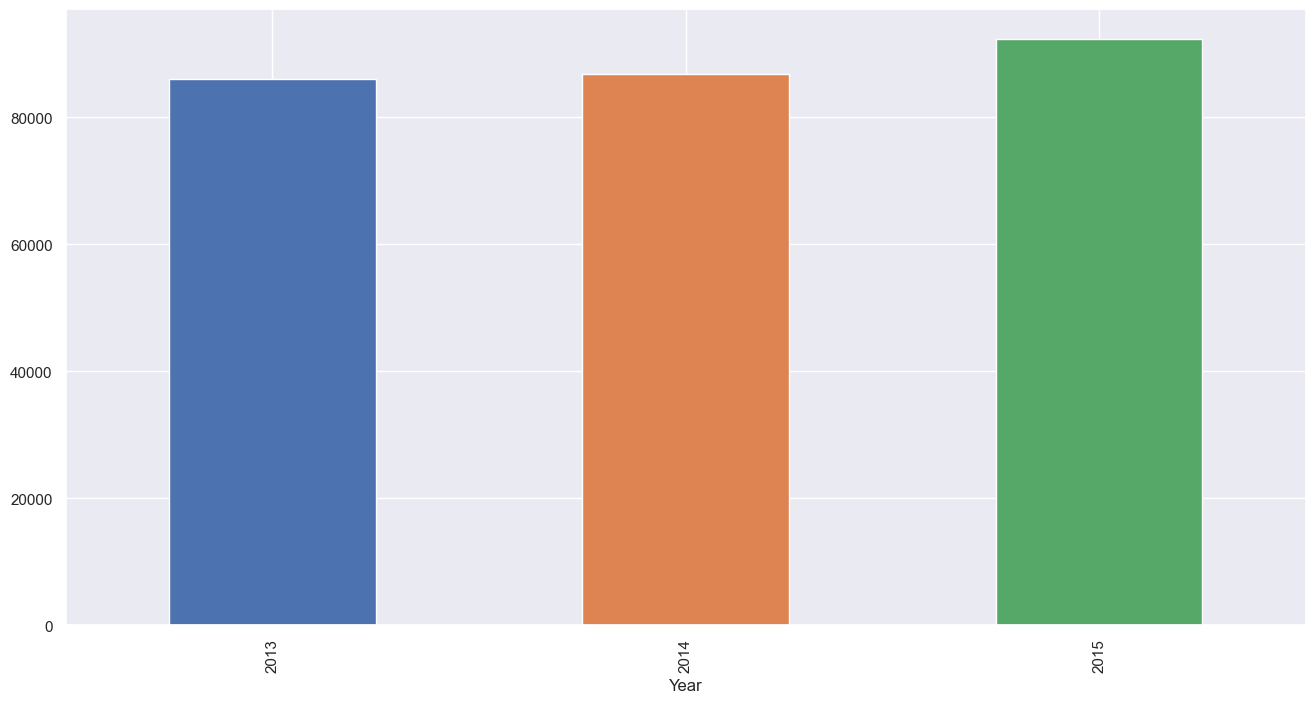

In [12]:
# a. By Year

plt.figure(figsize=(16,8))
crime_data["Year"].value_counts().sort_index().plot.bar(color=sns.color_palette())
plt.show()

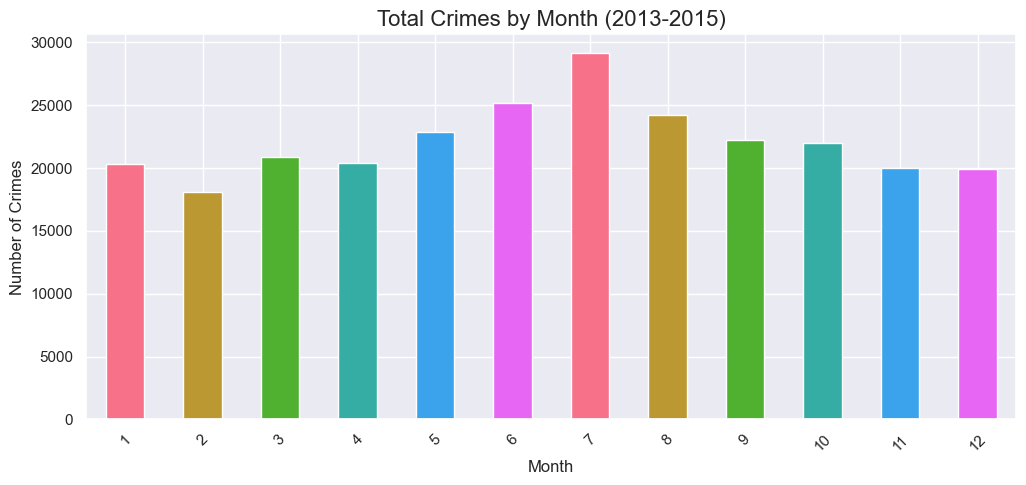

C:\Users\valcr\AppData\Local\Temp\ipykernel_33268\3192252270.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  crime_data.resample("M").size().plot(color="blue", legend=False)  # Updated to "M" but note the FutureWarning


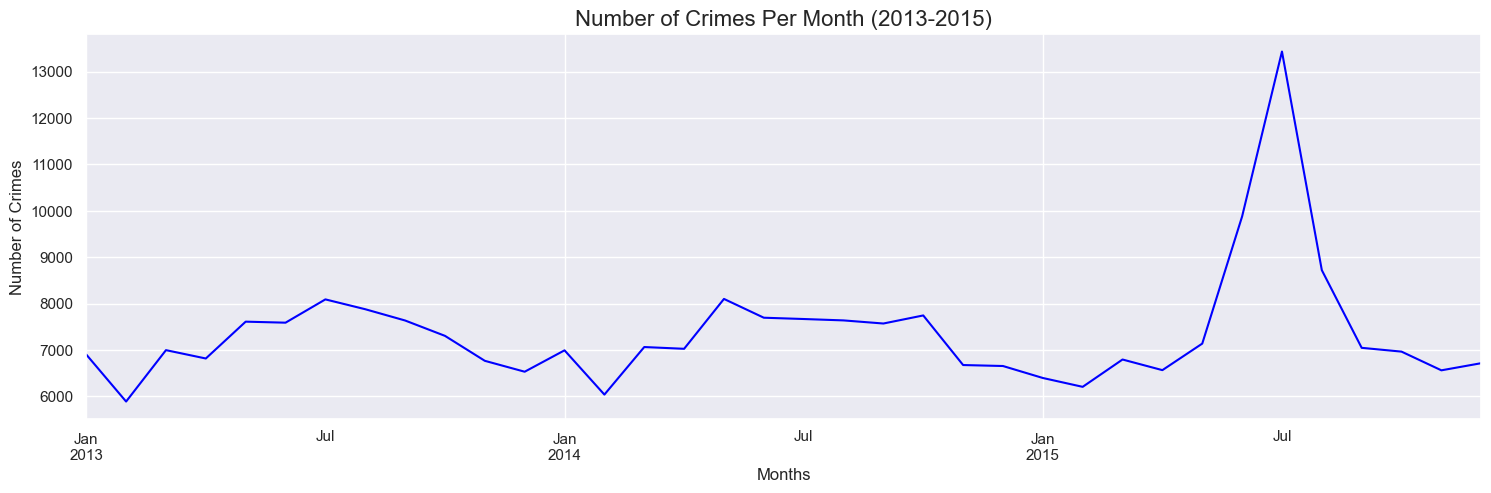

In [13]:
# b. By Month
plt.figure(figsize=(12, 5))
crime_data["Month"].value_counts().sort_index().plot.bar(color=sns.color_palette("husl"))
plt.title("Total Crimes by Month (2013-2015)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Resample data by month-end and plot trend over time
plt.figure(figsize=(18, 5))
crime_data.resample("M").size().plot(color="blue", legend=False)  # Updated to "M" but note the FutureWarning
plt.title("Number of Crimes Per Month (2013-2015)", fontsize=16)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.show()

I had suspected the spike is overlapping data between the legacy July 2012 - August 2015 and the new 2015, but I am not 100% sure. It could be July really is that active.

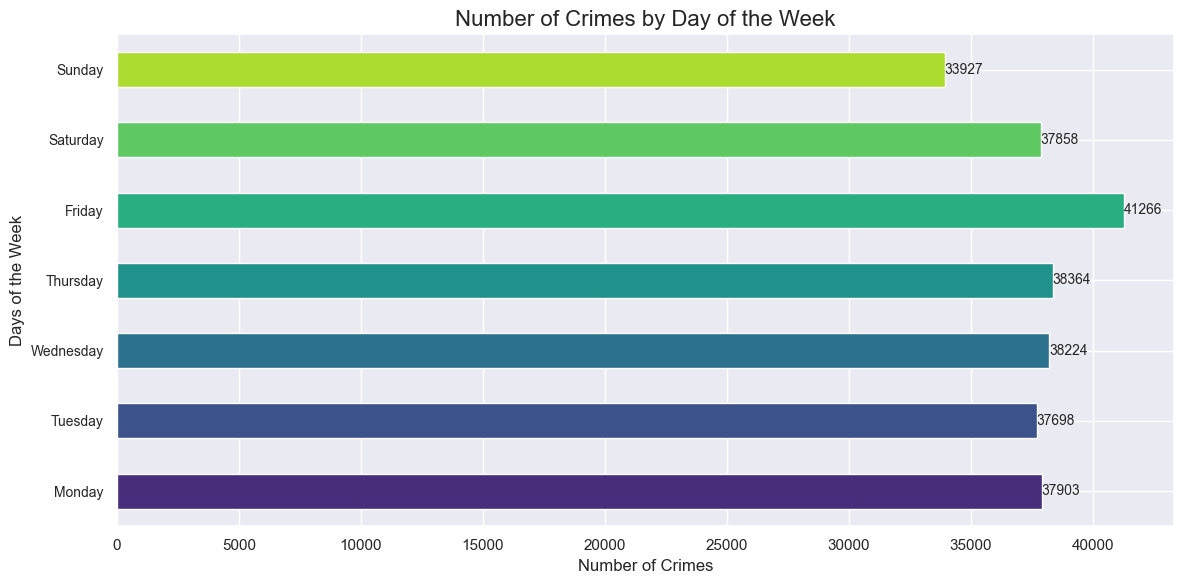

In [14]:
# c. Days of the week
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Group data by day of the week and plot
day_counts = crime_data.groupby(crime_data.index.dayofweek).size()

plt.figure(figsize=(12, 6))
ax = day_counts.plot(kind="barh", color=sns.color_palette("viridis", n_colors=7))

# Set labels and title
plt.ylabel("Days of the Week", fontsize=12)
plt.yticks(np.arange(7), days, fontsize=10)
plt.xlabel("Number of Crimes", fontsize=12)
plt.title("Number of Crimes by Day of the Week", fontsize=16)

# Add values to the bars
for i, value in enumerate(day_counts):
    plt.text(value, i, str(value), va="center", fontsize=10)

plt.tight_layout()
plt.show()

Sunday seems to be the least active, and Friday the most active, other than that it seems pretty consistent throughout.

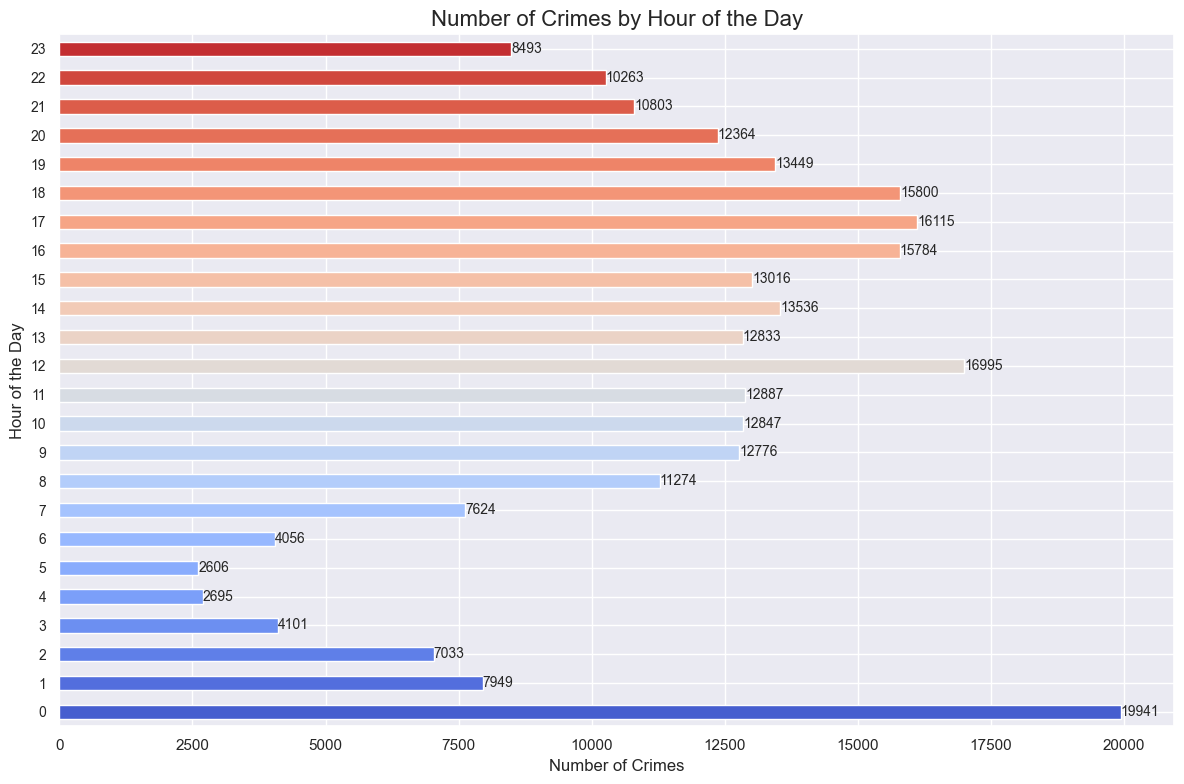

In [15]:
# d. Time of the Day
# Group data by hour and count
hour_counts = crime_data.groupby(crime_data.Hour).size()

plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
ax = hour_counts.plot(kind="barh", color=sns.color_palette("coolwarm", n_colors=24))

# Set labels and title
plt.ylabel("Hour of the Day", fontsize=12)
plt.yticks(np.arange(24), labels=np.arange(24), fontsize=10)
plt.xlabel("Number of Crimes", fontsize=12)
plt.title("Number of Crimes by Hour of the Day", fontsize=16)

# Annotate bars with values
for i, value in enumerate(hour_counts):
    plt.text(value, i, str(value), va="center", fontsize=10)

plt.tight_layout()
plt.show()

I would take the above data with a grain of salt, it's possible that for some of the rows, 0 is suppose to be null rather than 00:00, or maybe defaulted during reporting. 

Taking that out of consideration, crime seems to be most active between between 16:00 - 18:00 and least active between 04:00 - 05:00.

In [16]:
# e. Frequncy of Incident type
crime_data["Type"].value_counts().nlargest(10)

Type
OTHER                                              150711
Assault                                             21975
Vehicle-Related Offenses                            20012
Public Service and Other Non-Criminal Incidents     19049
Theft and Larceny                                   16270
Drug Offenses                                       10982
Fraud and Financial Crimes                          10312
Burglary                                             8019
Miscellaneous Offenses                               2613
Disorderly Conduct and Public Offenses               2404
Name: count, dtype: int64

In [17]:
crime_data["Type"].value_counts().nsmallest(10).sort_values(ascending=False)

Type
Theft and Larceny                         16270
Drug Offenses                             10982
Fraud and Financial Crimes                10312
Burglary                                   8019
Miscellaneous Offenses                     2613
Disorderly Conduct and Public Offenses     2404
Weapons and Firearms                       1282
Homicide                                   1174
Threats and Harassment                      344
Sexual Offenses                              93
Name: count, dtype: int64

For any reports or calculations that uses "Type", I will show with and without "OTHER"

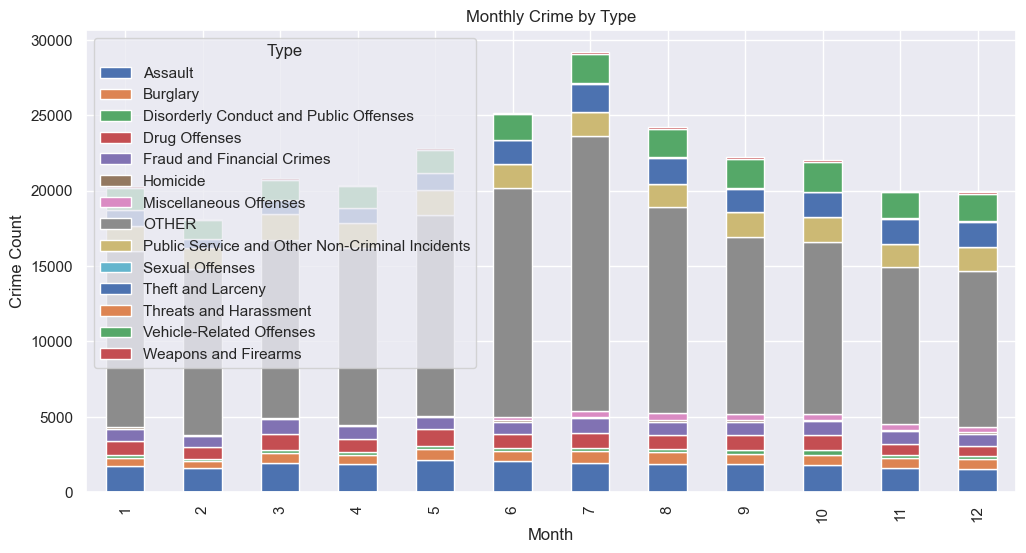

In [18]:
# With OTHER
monthly_crime_type = crime_data.groupby([crime_data.index.month, "Type"]).size().unstack()
monthly_crime_type.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Monthly Crime by Type")
plt.xlabel("Month")
plt.ylabel("Crime Count")
plt.show()

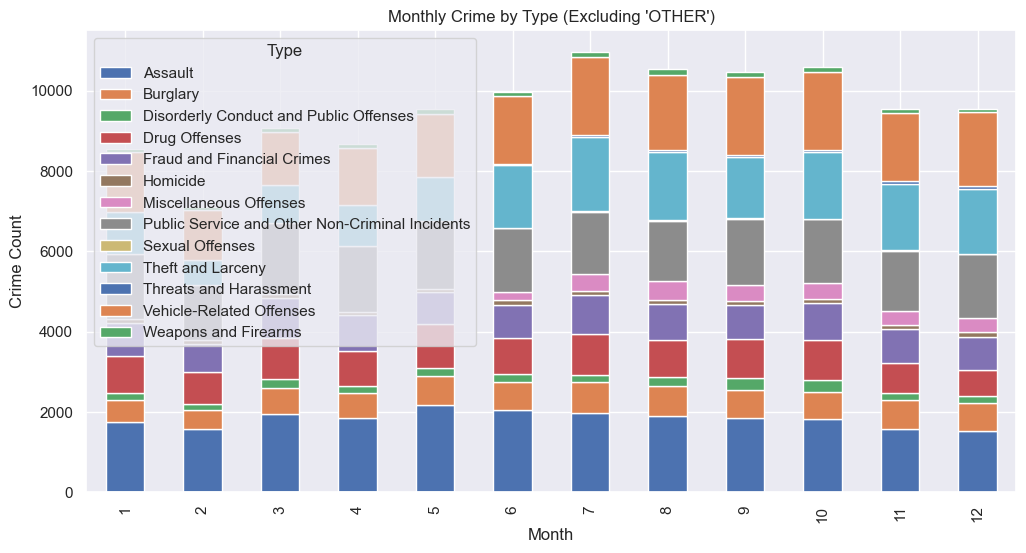

In [19]:
# Without OTHER
# Filter out the "OTHER" type from the data
crime_data_filtered = crime_data[crime_data["Type"] != "OTHER"]

# Group by month and crime type, then create the plot
monthly_crime_type = crime_data_filtered.groupby([crime_data_filtered.index.month, "Type"]).size().unstack()
monthly_crime_type.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Monthly Crime by Type (Excluding 'OTHER')")
plt.xlabel("Month")
plt.ylabel("Crime Count")
plt.show()

It looks like the type of crime stays relatively consistent, however I notice an uptick in Miscellaneous Offenses after June/July. I'm unsure if this is related to a discrepancy in reporting or not.

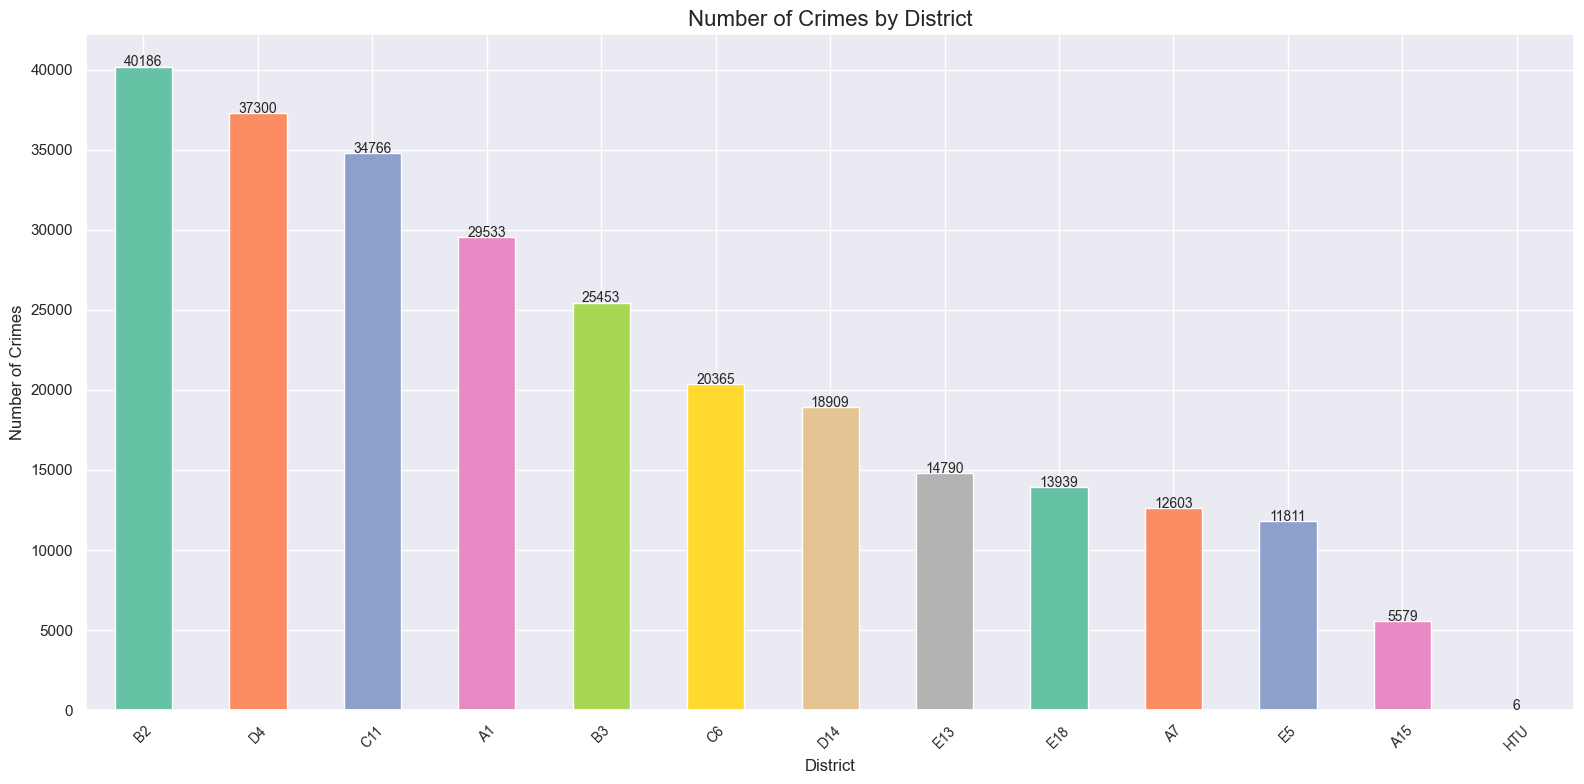

In [20]:
# f. Crime by District
# Calculate counts per district
district_counts = crime_data["District"].value_counts()

plt.figure(figsize=(16, 8))
ax = district_counts.plot(kind="bar", color=sns.color_palette("Set2", n_colors=len(district_counts)))

# Set labels and title
plt.title("Number of Crimes by District", fontsize=16)
plt.xlabel("District", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Add annotations to the bars
for i, count in enumerate(district_counts):
    plt.text(i, count + 10, str(count), ha="center", fontsize=10)

plt.tight_layout()
plt.show()

Seems like A15 (Charlestown), is the district with the least amount of crimes and B2 (Roxbur) is on top. As a resident of C11 (Dorchester) most of my life, I'm surprised B3 (Mattapan) is so low. Mattapan has always been refered to as "Murderpan" around my area, and when I lived there for a short period I never felt safe, even by a public train station. It seems C11 (Dorchester), is higher on the list and my perception/opinions on this is incorrect, possibly some sort of bias on my lived experience.

In [21]:
# g. Street
crime_data["Street"].value_counts().nlargest(10)

Street
WASHINGTON ST       13821
BOYLSTON ST          6584
BLUE HILL AV         5070
TREMONT ST           4299
DORCHESTER AV        3794
CENTRE ST            3760
MASSACHUSETTS AV     3553
COMMONWEALTH AV      3468
COLUMBIA RD          2578
HARRISON AV          2481
Name: count, dtype: int64

I've lived off of both Blue Hill Ave and Dorchester Ave for the majority of my life and fully expected both to be in the top 5. No surprise at all. I recently (Nov 2024) moved back to a street off of Washington St, and I've been hearing sirens everyday. 

Despite this however, the area has improved A LOT compared to what I remembered a decade or two ago, around the time these datasets was collected. Will need to include 2015 to present at some point.

Overall Shooting vs Non-shooting: 0.23% shooting incidents


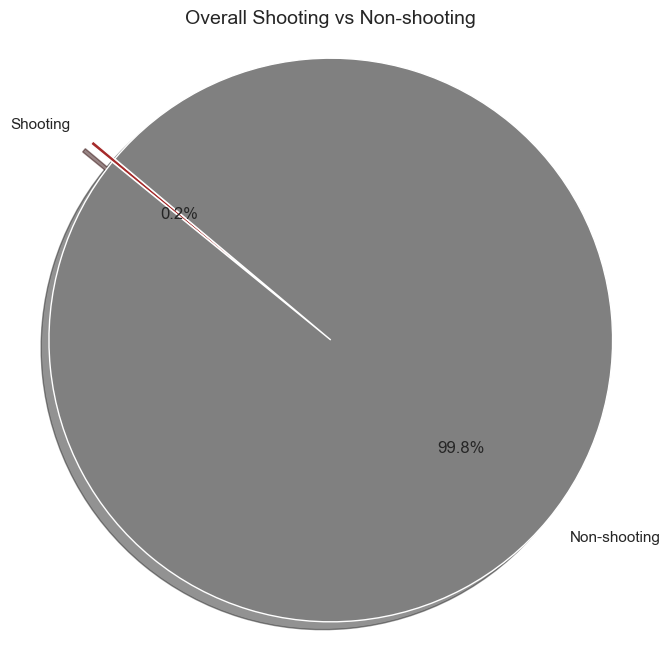

For district B2 (Roxbury)
Shooting vs Non-shooting in B2: 0.50% shooting incidents


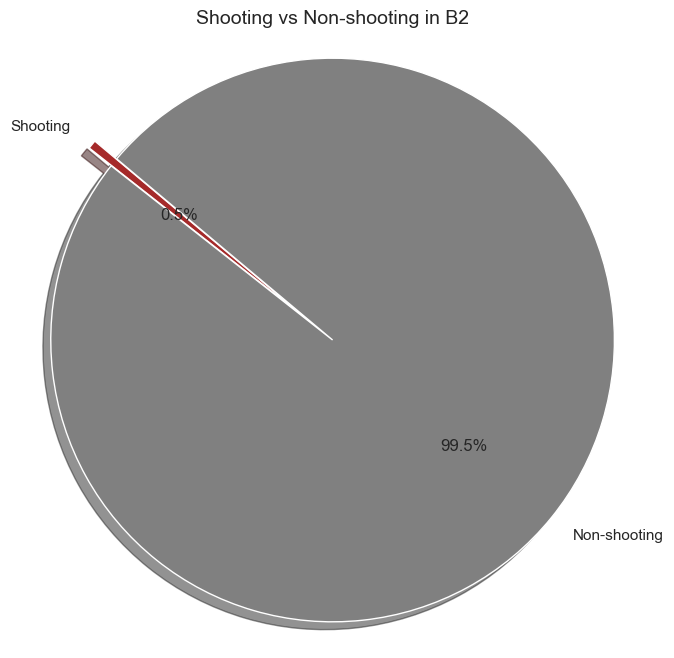

For district D4 (South End)
Shooting vs Non-shooting in D4: 0.10% shooting incidents


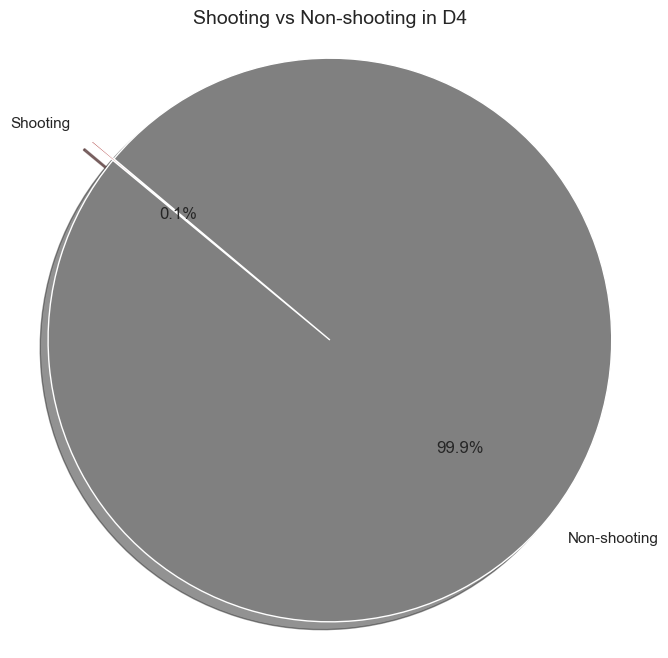

For district C11 (Dorchester)
Shooting vs Non-shooting in C11: 0.36% shooting incidents


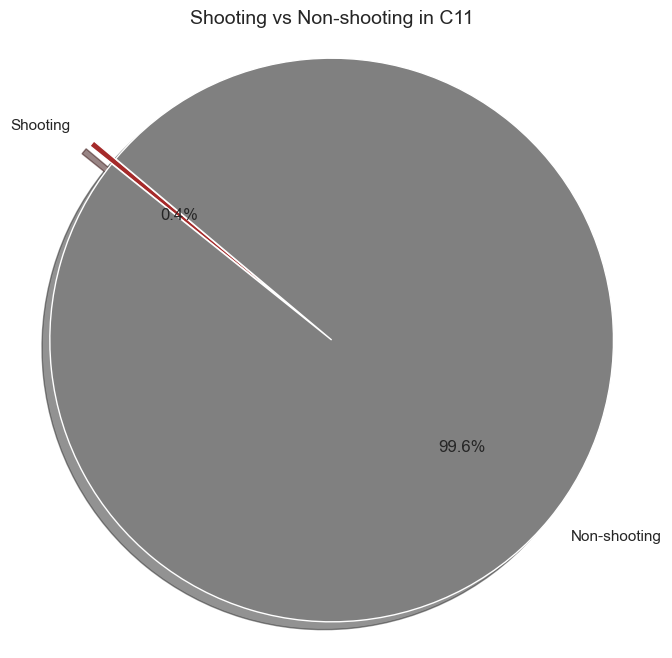

In [22]:
# h. Shooting vs Non-shooting
# Function to calculate percentages and plot pie charts
def plot_shooting_pie(crime_data, district=None):
    if district:
        # Filter crime_data for the specific district
        district_data = crime_data[crime_data["District"] == district]
        shooting_count = district_data[district_data["Shooting"] == "Yes"].shape[0]
        non_shooting_count = district_data[district_data["Shooting"] == "No"].shape[0]
        title = f"Shooting vs Non-shooting in {district}"
    else:
        # Overall data
        shooting_count = crime_data[crime_data["Shooting"] == "Yes"].shape[0]
        non_shooting_count = crime_data[crime_data["Shooting"] == "No"].shape[0]
        title = "Overall Shooting vs Non-shooting"
    
    # Calculate percentages
    total = shooting_count + non_shooting_count
    shooting_percentage = (shooting_count / total) * 100 if total else 0
    print(f"{title}: {shooting_percentage:.2f}% shooting incidents")

    # Plot data
    labels = ["Shooting", "Non-shooting"]
    sizes = [shooting_count, non_shooting_count]
    colors = ["brown", "gray"]
    explode = (0.1, 0)  # Explode the first slice

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title(title, fontsize=14)
    plt.axis("equal")  # Equal aspect ratio ensures the pie is drawn as a circle.
    plt.show()

# Overall shooting vs non-shooting
plot_shooting_pie(crime_data)

top_district_mapping = {
    "B2": "Roxbury",
    "D4": "South End",
    "C11": "Dorchester"
}

# Shooting vs non-shooting for top districts
for district in [key for key in top_district_mapping.keys()]:
    print(f"For district {district} ({top_district_mapping[district]})")
    plot_shooting_pie(crime_data, district=district)


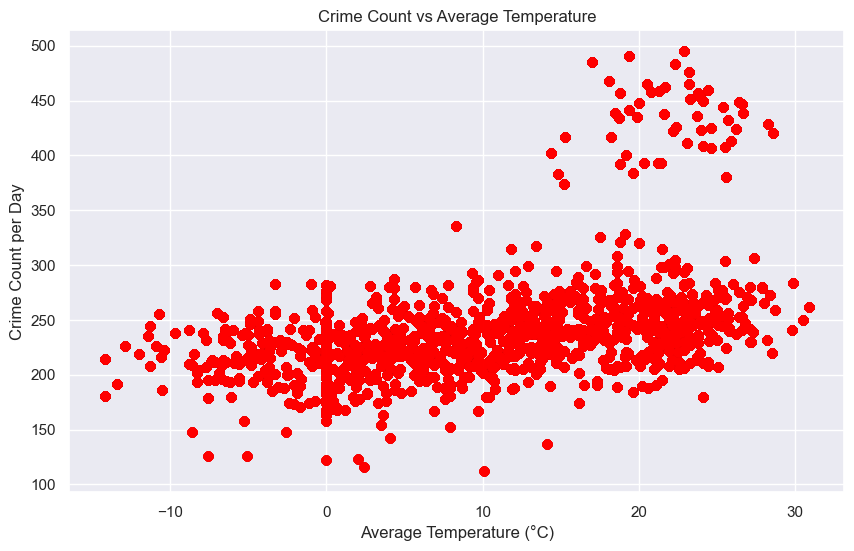

In [23]:
# i. Weather
# Count the number of crimes per day
crime_per_day = crime_data.groupby(crime_data.index.date).size()

# Convert the index to datetime and reset the index
crime_per_day = crime_per_day.reset_index(name="Crime_Count")
crime_per_day["Date"] = pd.to_datetime(crime_per_day["index"])

# Merge crime count with weather data using the Date column
merged_data = pd.merge(crime_per_day, crime_data[["Avg Temp (C)"]], left_on="Date", right_index=True, how="left")

# Scatter plot to visualize relationship between temperature and crime count
plt.figure(figsize=(10, 6))
plt.scatter(merged_data["Avg Temp (C)"], merged_data["Crime_Count"], alpha=0.6, color='red')
plt.title("Crime Count vs Average Temperature")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Crime Count per Day")
plt.show()


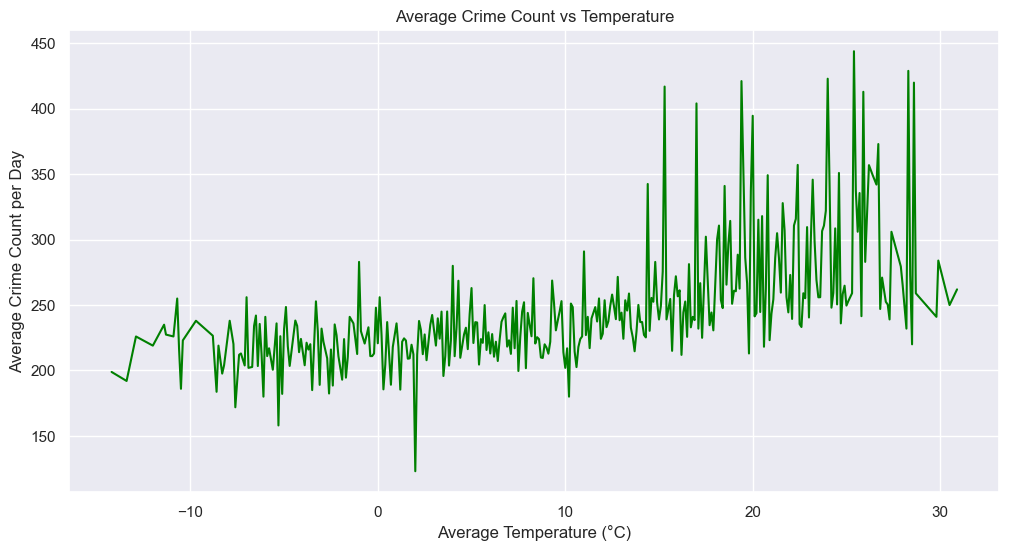

In [24]:
# You could also plot the average crime count for temperature ranges
merged_data.groupby("Avg Temp (C)")["Crime_Count"].mean().plot(kind="line", figsize=(12, 6), color="green")
plt.title("Average Crime Count vs Temperature")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Average Crime Count per Day")
plt.show()


In [25]:
# Calculate the correlation between Avg Temp (C) and Crime Count
correlation = merged_data["Avg Temp (C)"].corr(merged_data["Crime_Count"])
print(f"Correlation between Average Temperature and Crime Count: {correlation}")

Correlation between Average Temperature and Crime Count: 0.46693638888172345


Since we have a positive correlation, this would suggest that as temperature increases, crime counts also tend to increase.

C:\Users\valcr\AppData\Local\Temp\ipykernel_33268\2868503383.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crime_by_temp = crime_data.groupby(["Temperature_Category", "Type"])["Date"].count().unstack()
C:\Users\valcr\AppData\Local\Temp\ipykernel_33268\2868503383.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crime_by_temp_filtered = crime_data_filtered.groupby(["Temperature_Category", "Type"])["Date"].count().unstack()


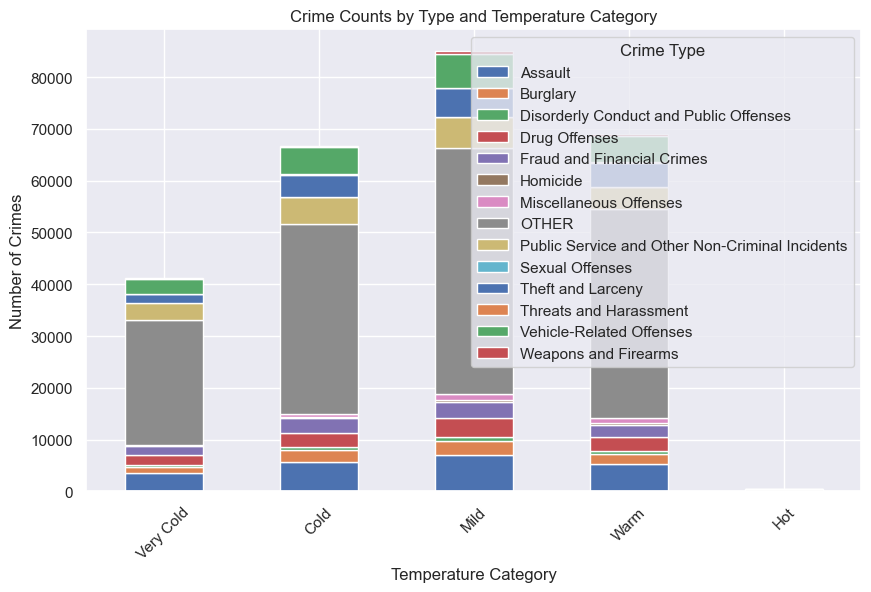

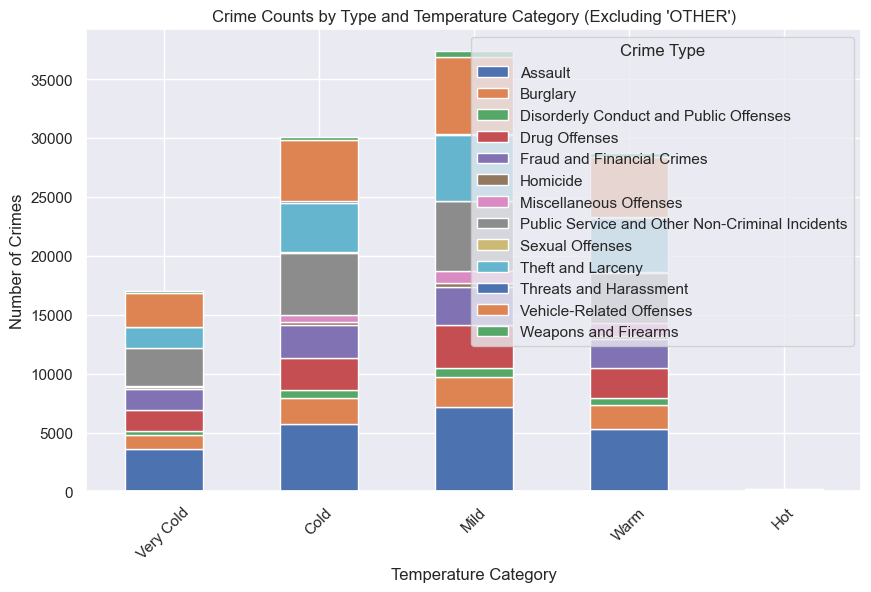

Chi-square test p-value: 3.9050264735226e-293
Chi-square test p-value for filthered data: 7.107019730355499e-255
There is a significant relationship between crime type and temperature category.
More so when we exclude 'OTHER'


In [26]:
#Categorize weather conditions into bins (temperature bins for this example)
temperature_bins = pd.cut(crime_data["Avg Temp (C)"], bins=[-10, 0, 10, 20, 30, 40], labels=["Very Cold", "Cold", "Mild", "Warm", "Hot"])

# Add the temperature bin as a new column
crime_data["Temperature_Category"] = temperature_bins

# Filter out the "OTHER" type from the data
crime_data_filtered = crime_data[crime_data["Type"] != "OTHER"]

# Count crimes by type and temperature category
crime_by_temp = crime_data.groupby(["Temperature_Category", "Type"])["Date"].count().unstack()
# Filtered 
crime_by_temp_filtered = crime_data_filtered.groupby(["Temperature_Category", "Type"])["Date"].count().unstack()

# Visualize the data to understand the distribution of crime types across temperature categories
crime_by_temp.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Crime Counts by Type and Temperature Category")
plt.xlabel("Temperature Category")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.legend(title="Crime Type")
plt.show()

# Without OTHER
crime_by_temp_filtered.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Crime Counts by Type and Temperature Category (Excluding 'OTHER')")
plt.xlabel("Temperature Category")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.legend(title="Crime Type")
plt.show()

# Chi-square test
from scipy.stats import chi2_contingency

# Create a contingency table for Chi-square test
crime_temp_contingency = pd.crosstab(crime_data["Temperature_Category"], crime_data["Type"])
chi2, p, dof, expected = chi2_contingency(crime_temp_contingency)
# Without OTHER
crime_temp_contingency_filthered = pd.crosstab(crime_data_filtered["Temperature_Category"], crime_data_filtered["Type"])
chi2_filtered, p_filthered, dof_filthered, expected_filthered = chi2_contingency(crime_temp_contingency_filthered)

print(f"Chi-square test p-value: {p}")
print(f"Chi-square test p-value for filthered data: {p_filthered}")

if p < 0.05 and p_filthered < 0.05:
    print("There is a significant relationship between crime type and temperature category.")
    if p < p_filthered:
        print("More so when we exclude 'OTHER'")
    else:
        print("Less so when we exclude 'OTHER'")
else:
    print("There is no significant relationship between crime type and temperature category.")


In [27]:
# j. Map
# I submitted a request for the statewide vector data from mass.gov on 11/30/2024, waiting on this data